<a href="https://colab.research.google.com/github/DaeSeokSong/summarize-study/blob/master/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install pycocotools
!pip install opencv_python
!pip install numpy
!pip install torchvision
!pip install Pillow
!pip install vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vision: filename=vision-1.0.0-py3-none-any.whl size=2169 sha256=0ea7a563421257f75d5f772958c1957073313f2b55764ab9f189447a95d9a296
  Stored in directory: /root/.cache/pip/wheels/73/24/1b/ba0312d8c96b9b29673f20076f87bd668d520b05aeb728444e
Successfully built vision


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Fast_Campus/Pytorch/Faster-RCNN-with-torchvision-master/

/content/drive/MyDrive/Fast_Campus/Pytorch/Faster-RCNN-with-torchvision-master


In [4]:
import torch
import torchvision
import cv2
import numpy as np

import sys
sys.path.append('./')

import coco_names # coco에 있는 이름과 인덱스
import random

from google.colab.patches import cv2_imshow

In [5]:
model_path = './result/model_19.pth'
image_path='./imgs/2.jpg'
model_name ='fasterrcnn_resnet50_fpn' # fast rcnn의 resnet 50 모델 사용
dataset_name ='coco' # coco 데이터셋 사용
score_threshold = 0.0

In [6]:
def random_color():
    b = random.randint(0,255)
    g = random.randint(0,255)
    r = random.randint(0,255)

    return (b,g,r)

In [9]:
def main():
    input = []
    if dataset_name == 'coco':
        num_classes = 91 # 클래스 개수
        names = coco_names.names # 클래스 이름 목록 사전
        
    # Model creating
    print("Creating model")
    # detection 모델 중 [model_name]의 모델 불러온다.
    # Alexnet, DenseNet 등 torchvision의 models docs에 가면 상세히 나와있다.
    # 가중치 같은 하이퍼파라미터 값 및 성능, 논문도 공개되어 있다.
    model = torchvision.models.detection.__dict__[model_name](num_classes=num_classes, pretrained=True)  
    model = model.cuda()

    # Not ramin gradient (학습 X, 테스트 O)
    model.eval()

    # save = torch.load(model_path)
    # model.load_state_dict(save['model'])

    # h, w, c
    src_img = cv2.imread(image_path)

    # BGR to RGB 
    img = cv2.cvtColor(src_img,cv2.COLOR_BGR2RGB)

    # scale 0~1, shape c,h,w 
    # permute == translate
    img_tensor = torch.from_numpy(img/255.).permute(2,0,1).float().cuda()
    input.append(img_tensor)

    #1,c,h,w
    out = model(input)
    boxes = out[0]['boxes']
    labels = out[0]['labels']
    scores = out[0]['scores']

    for idx in range(boxes.shape[0]):
        if scores[idx] >= score_threshold:
            x1, y1, x2, y2 = boxes[idx][0], boxes[idx][1], boxes[idx][2], boxes[idx][3]
            name = names.get(str(labels[idx].item())) # names에서 클래스명 불러오기
            # cv2.rectangle(img,(x1,y1),(x2,y2),colors[labels[idx].item()],thickness=2)
            print(src_img.shape, x1,y1,x2,y2)
            cv2.rectangle(src_img,(int(x1),int(y1)),(int(x2),int(y2)),random_color(),thickness=2)
            cv2.putText(src_img, text=name, org=(int(x1), int(y1)+10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=0.5, thickness=1, lineType=cv2.LINE_AA, color=(0, 0, 255))

    cv2_imshow(src_img)
    # cv2.imwrite('assets/11.jpg',img)

Creating model
(333, 500, 3) tensor(245.4672, device='cuda:0', grad_fn=<SelectBackward0>) tensor(50.3707, device='cuda:0', grad_fn=<SelectBackward0>) tensor(316.2784, device='cuda:0', grad_fn=<SelectBackward0>) tensor(157.0618, device='cuda:0', grad_fn=<SelectBackward0>)
(333, 500, 3) tensor(74.1687, device='cuda:0', grad_fn=<SelectBackward0>) tensor(19.5567, device='cuda:0', grad_fn=<SelectBackward0>) tensor(144.9687, device='cuda:0', grad_fn=<SelectBackward0>) tensor(161.8655, device='cuda:0', grad_fn=<SelectBackward0>)
(333, 500, 3) tensor(16.6159, device='cuda:0', grad_fn=<SelectBackward0>) tensor(24.7124, device='cuda:0', grad_fn=<SelectBackward0>) tensor(486.5868, device='cuda:0', grad_fn=<SelectBackward0>) tensor(330.4807, device='cuda:0', grad_fn=<SelectBackward0>)
(333, 500, 3) tensor(4.0995, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0., device='cuda:0', grad_fn=<SelectBackward0>) tensor(80.9728, device='cuda:0', grad_fn=<SelectBackward0>) tensor(128.1900, device='cud

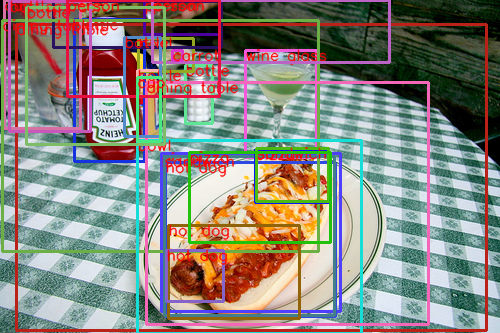

In [10]:
main()